# Lecture 6: Graphics with R
- Graphical functions & parameters
- Multiple plots on one page
- Save a plot

There are different packages in R that suit all kinds of plotting needs people may have.
- <b>graphics</b>
    - In base R and loads automatically every time you open R
- <b>grid</b>
    - In base R but does not load automatically
- <b>ggplot2</b>
    - Not in base R
    - Create Elegant Data Visualisations Using the Grammar of Graphics
    - Depends on <b>grid</b>
- ...

Today we use the <b>graphics</b> package to draw various 2D plots.

https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html

##### You will have to google a lot.
##### You cannot imagine how much I googled to make these lecture notes.

In [1]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# 6.1 Graphical functions &  parameters
### Functions:
#### New plot
- plot( )
- pie( )
- boxplot( )
- hist( )
- curve( )
- ...

#### Add to existing plot
- lines( )
- points( )
- abline( )
- legend( )
- axis( )
- ...

### Parameters
Parameters are used to customize your plots. I will show the use of some parameters here and there in the lecture. 

There are many so you will not see all the parameters here. Check out the link below or google when you need to plot something fancy.

https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/par.html

Different parameters are allowed in different functions. Parameters can also be specified before plotting using <b>par( )</b>.

## 6.1.1 Scatter plot
###### Coffee consumption vs. screen time

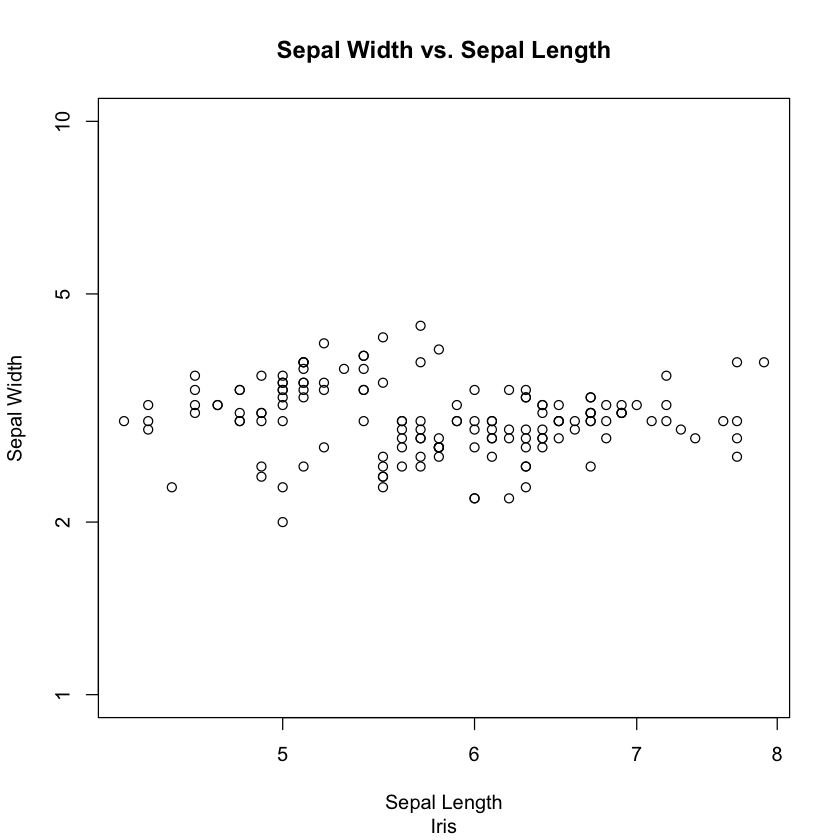

In [3]:
# Some parameters related to titles, labels, limits...
plot(x = iris$Sepal.Length, y = iris$Sepal.Width,
     main = "Sepal Width vs. Sepal Length",    # Title
     sub = "Iris",                             # Sub title
     xlim = range(iris$Sepal.Length),          # limits of x-axis
     ylim = c(1, 10),                                   # Limits of y-axis
     xlab = "Sepal Length",                    # Label of x-axis
     ylab = "Sepal Width",                    # Label of y-axis
     log = "xy"                                 # Axis to be set on log scale
)            
# x and y are arguments - these two are sufficient for a plot
# In this plot, I specified some most basic graphical parameters.

##### See the changes in all sepal lengths

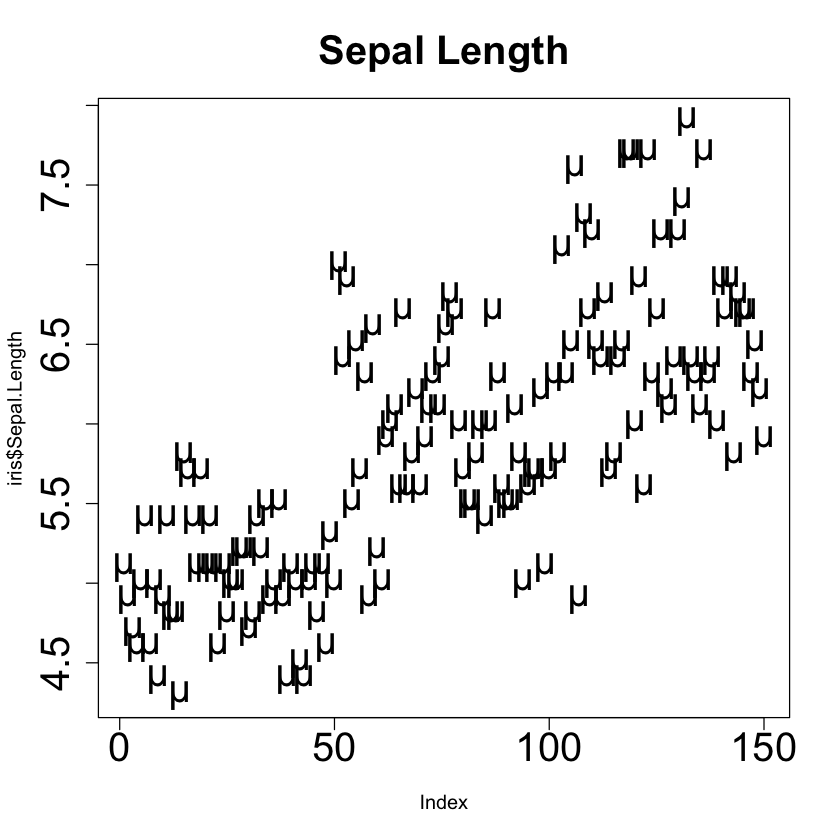

In [4]:
# Some parameters related to text and plot size.
plot(iris$Sepal.Length,
     type = "p",    # Type of plot, default is points.
     pch = "µ",     # plotting symbols, 1~25 plus anything you want.
     cex = 2,       # Plotting text and symbol size
     cex.axis = 2,  # Axis annotation size
     main = "Sepal Length", 
     cex.main = 2,  # Title text size
     cex.lab = 1,   # Axis label size
     lwd = 1,       # Line width
     lty = 4
)

## 6.1.2 Pie plot

In [5]:
table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 

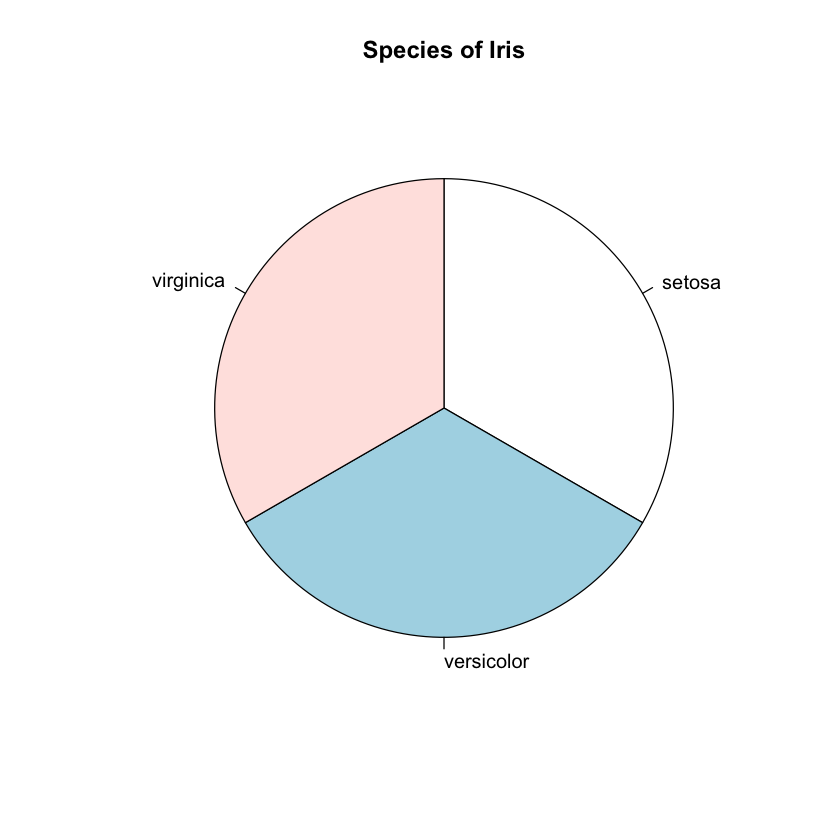

In [6]:
# My second pie chart......
pie(x = table(iris$Species),
#     col = 1:3,
    clockwise = T,
    main = "Species of Iris",  
)

## 6.1.3 Histogram
##### hist(x) requires that the x is numeric.
##### Consider barplot(x) and plot(x, type = "h") if x is not numeric.

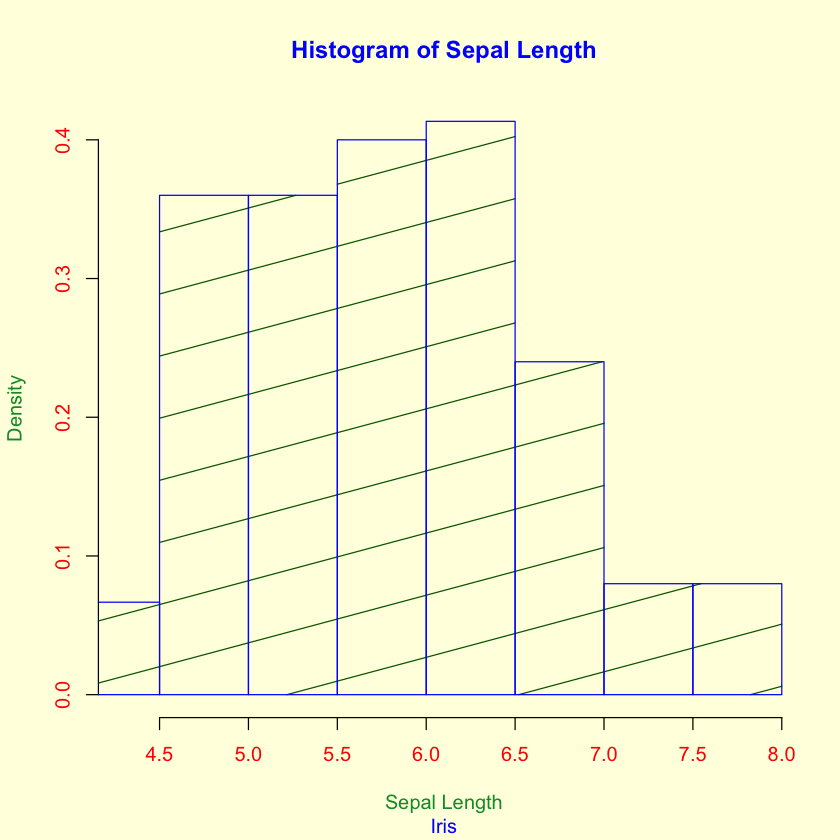

In [7]:
# Some parameters related to colors
par(bg = "lightyellow") # par() sets graphical parameters before plots.

hist(iris$Sepal.Length,
     freq = F,             # count or proportion
#      breaks = 15,
     breaks = seq(from = 4,to = 8,by = 0.5),
     xlim = range(iris$Sepal.Length),
     main = "Histogram of Sepal Length",
     sub = "Iris",
     xlab = "Sepal Length",
     col.main = "blue",
     col.axis = 2,
     col.lab = "#009933",
     col.sub = 4,           # multiple ways to specify color.
     col = "darkgreen",
     border = "blue",       # Color of border of the bars
     density = 2,           # density of shading lines
     angle = 15             # angle of shading lines, in degrees.
)
# border, density and angle are parameters specific to hist().
# Mostly showed parameters related to colors.
# Sorry I am really really really bad with colors.


    setosa versicolor  virginica 
        50         50         50 

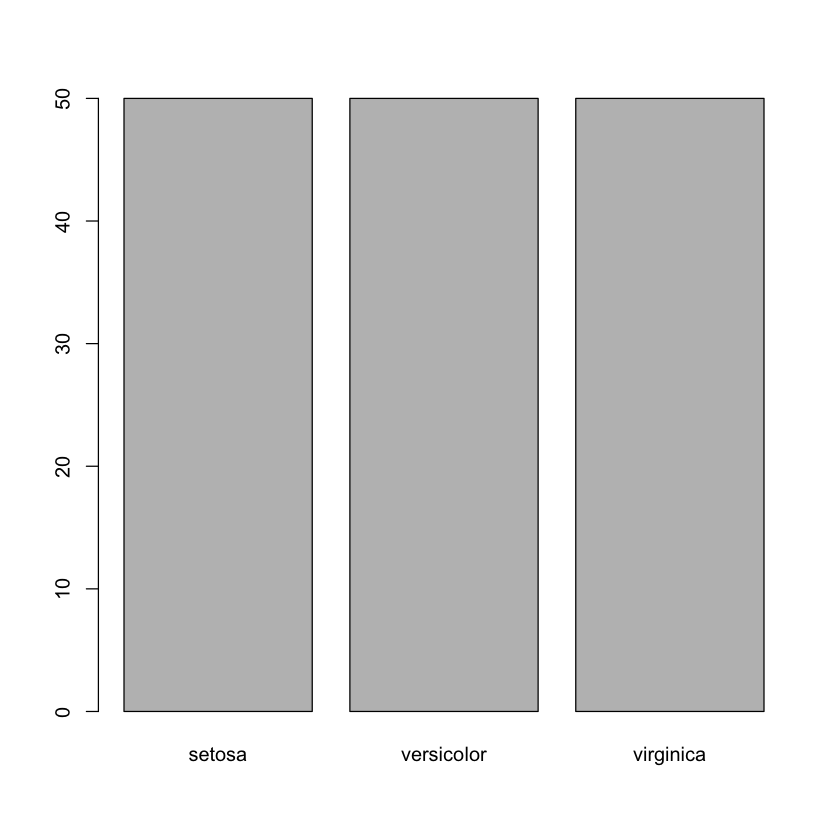

In [8]:
table(iris$Species)
barplot(table(iris$Species))

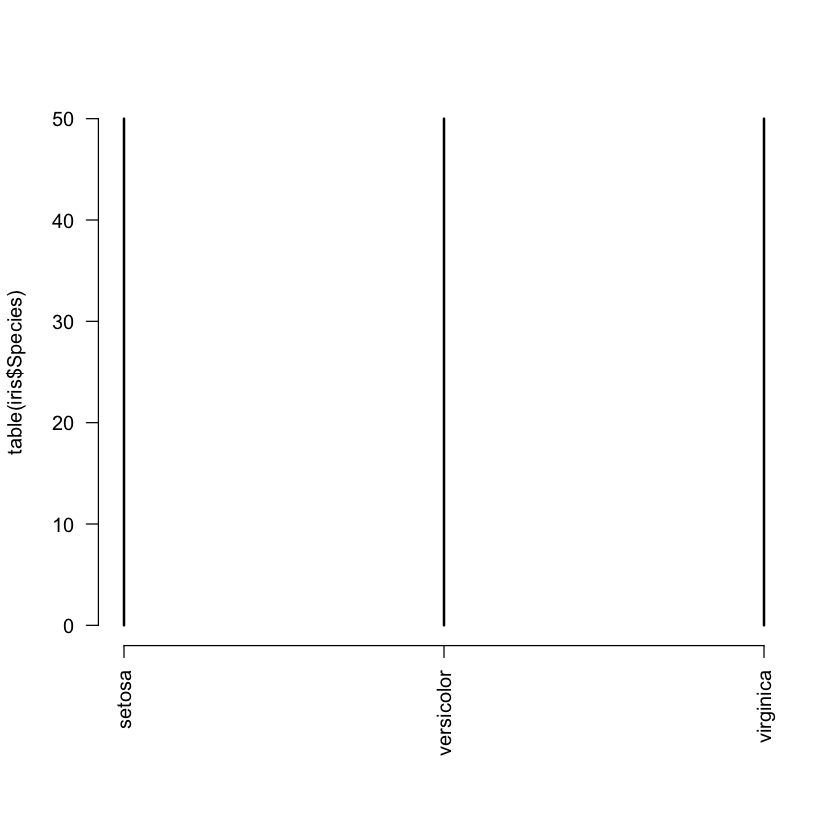

In [9]:
par(mar = c(8, 4, 4, 2) + 0.1) 
# Set the margins around the plotting area
plot(table(iris$Species), type = "h", las = 2)
# las controls the orientation of axis annotations.

## 6.1.5 Boxplot

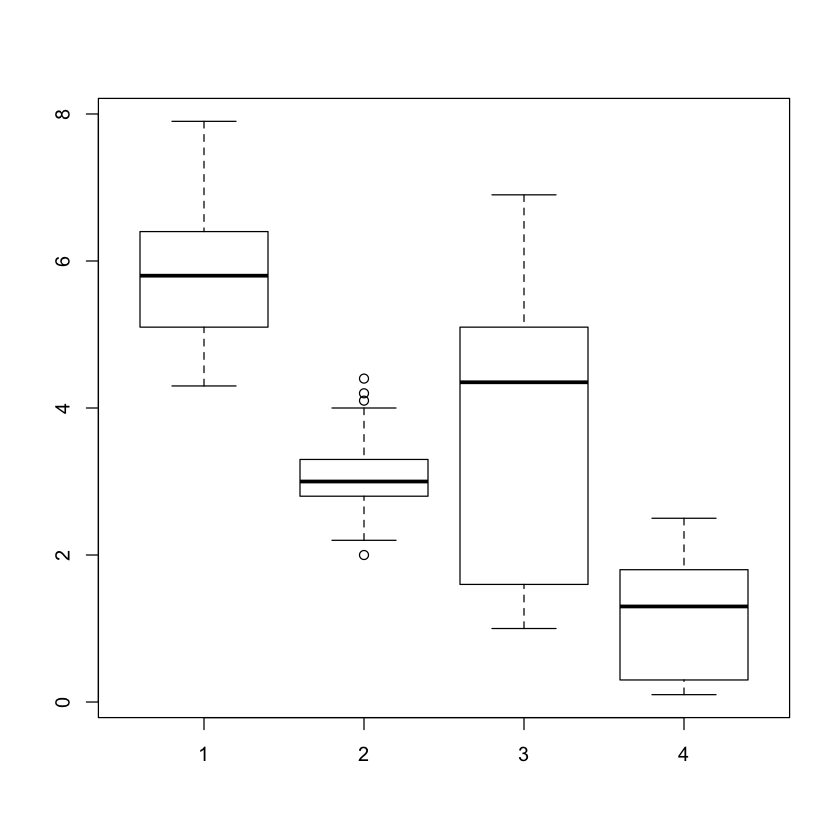

In [10]:
boxplot(iris$Sepal.Length, iris$Sepal.Width, iris$Petal.Length, iris$Petal.Width)

## 6.1.6 Draw functions

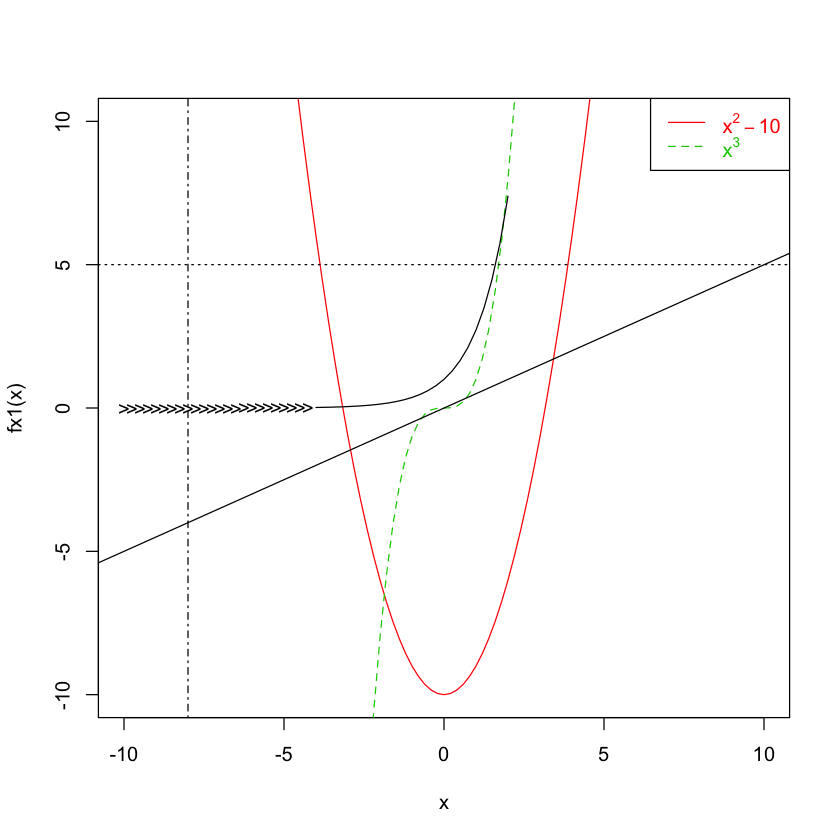

In [11]:
fx1 <- function(x){x^2-10}
fx2 <- function(x){x^3}

curve(fx1,
      xlim = c(-10, 10), ylim = c(-10, 10),
      col = 2, lty = 1)
curve(fx2, add = TRUE,   # add is an parameter in curve()
      col = 3, lty = 2)  # TRUE -> plot on the existing plot

x <- seq(from = -10, to = 2, by = 0.25)
y1 <- exp(x[1:24])
y2 <- exp(x[25:49])
points(x=x[1:24], y=y1, pch = ">")  # Add these points to the existing plot
lines(x=x[25:49], y=y2)
# Add the smooth line containing these points to the existing plot
# lines(x=x, y=y)     

abline(h = 5, lty = 3)      # h -> horizontal line at y = 5 
abline(v = -8, lty = "dotdash")     # v => vertical line at x = -8

abline(a = 0, b = 1/2)      # y = a + bx

# legend
legend("topright",       # Can also be "top", "bottomright", ...
       c(expression(paste(x^2-10)), expression(paste(x^3))),
       col = c(2,3),      # Usually corresponds to the plot
       lty = c(1,2),
       text.col = c(2,3))

##### Draw density functions

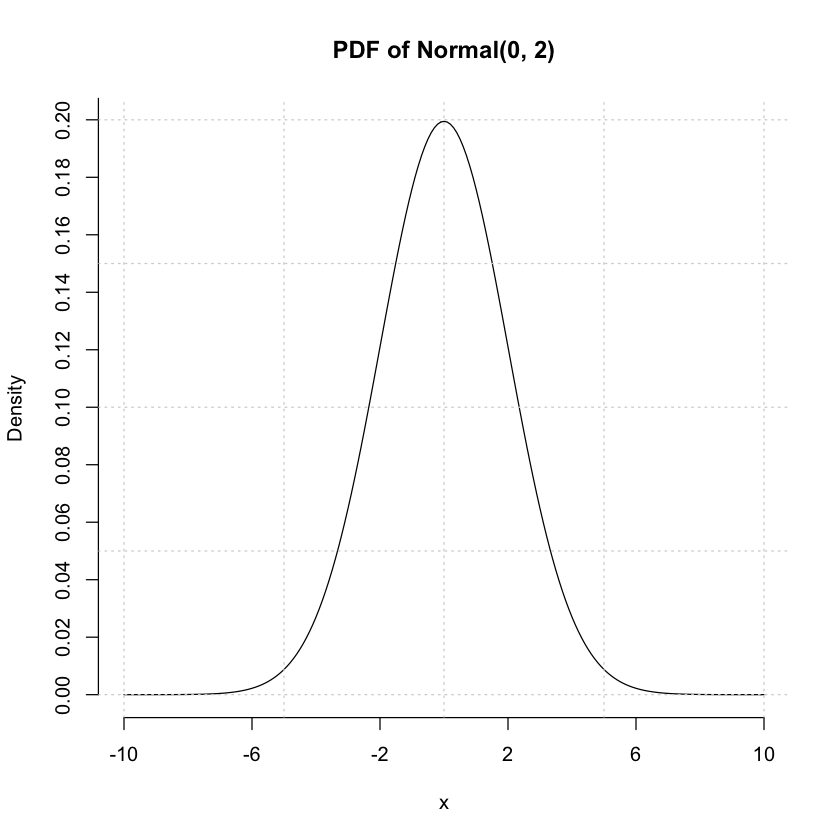

In [12]:
xx <- seq(from = -10, to = 10, by = 0.1)
yy <- dnorm(xx, mean = 0, sd = 2)  
# dnorm() gives the normal distribution density
plot(x = xx, y = yy, type = "l", main = "PDF of Normal(0, 2)",
     axes = F,      # Suppress axes
     xlab = "x", ylab = "Density"
)
# axis() allows us to customize axes.
axis(1, at = seq(from = -10, to = 10, by = 4))
axis(2, at = seq(from = 0, to = 1, by = 0.02))
grid()   # add grid lines.
# Explore the parameters allowed in grid()

## 6.2 Multiple plots on one page
        - par(mfrow = )
        - layout()

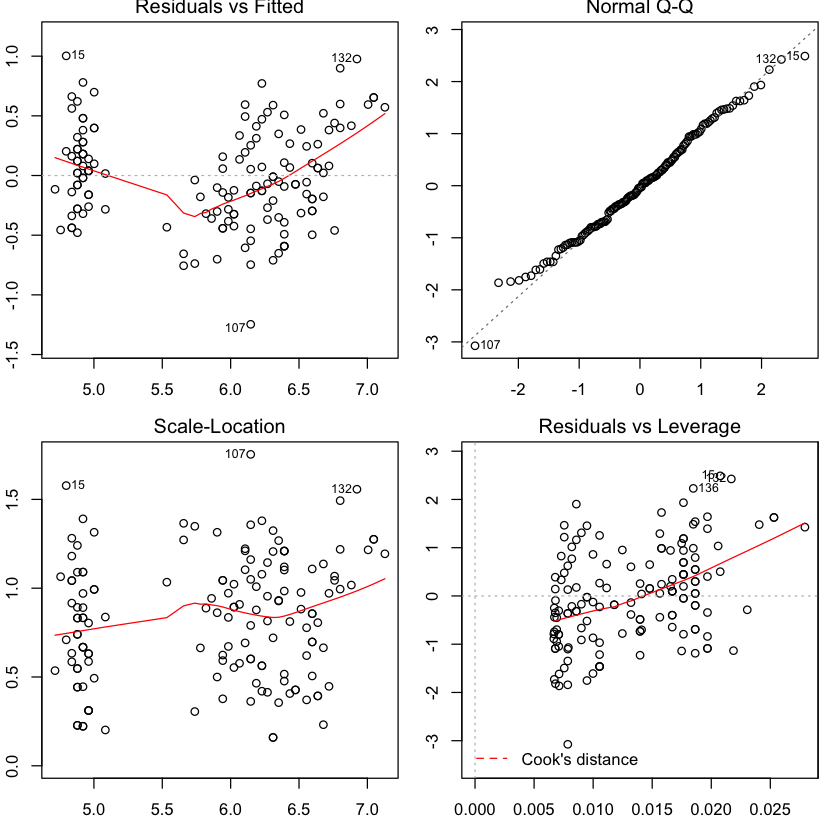

In [13]:
par(mfrow = c(2,2), mar = c(3, 2, 1, 1) + 0.1) # 2 x 2 = 4 plots on the same page, mar allows us to change margin
plot(lm(Sepal.Length~Petal.Length, data = iris))
# lm() for linear regression - EPIB 621 material
# Plot your linear regression object will give 4 diagnostic plots.

In [14]:
matrix(c(1,1,2,3), 2, 2, byrow = TRUE)

1,1
2,3


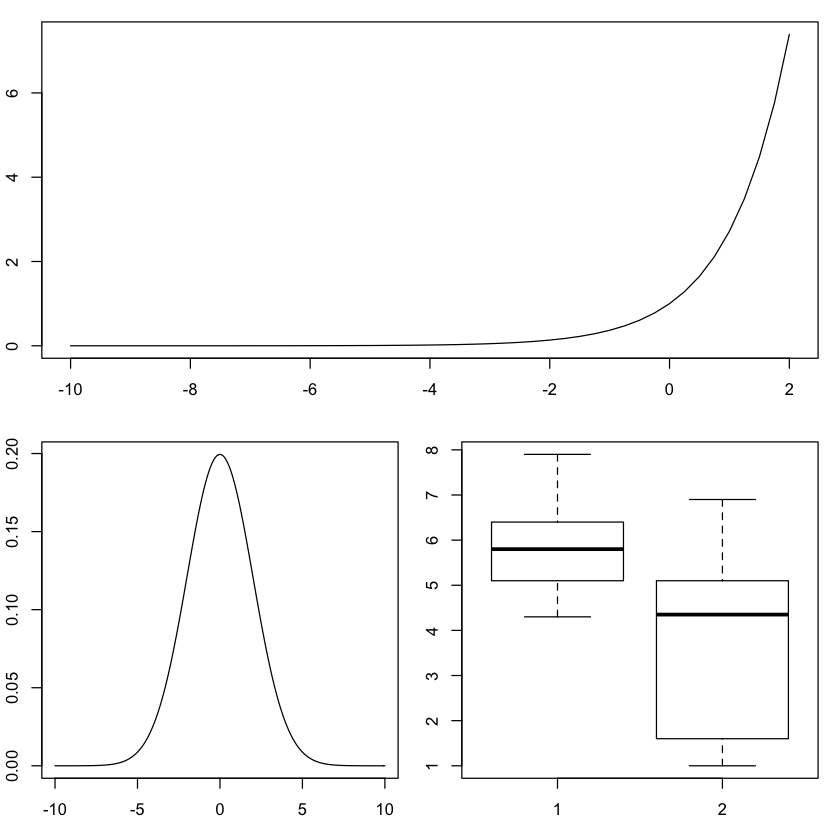

In [15]:
nf <- layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
par(mar = c(3, 2, 1, 1) + 0.1)
# layout.show(nf)  # Shows the partition of the plotting area
plot(x=x, y=c(y1, y2), type = "l")
plot(x=xx, y=yy, type = "l")
boxplot(iris$Sepal.Length, iris$Petal.Length)

## 6.3 Save a plot
##### Click!
##### or

In [16]:
pdf(file = "Normal_Density.pdf")

plot(x = xx, y = yy, type = "l", main = "PDF of Normal(0, 2)",
     axes = F, xlab = "x", ylab = "Density")
axis(1, at = seq(from = -10, to = 10, by = 2))
axis(2, at = seq(from = 0, to = 1, by = 0.02))
grid()

dev.off()

pdf 
  2

## Exercise for bonus points!
Use a for loop, draw and save density plots of Normal(0,1), Normal(1,2), Normal(2,3), Normal(3,4) and Normal(4,5) in pdf format.

Requirements:
- The plots should have the same axis limits and labels.
- The title of the plots should be Normal(0,1), Normal(1,2), Normal(2,3), Normal(3,4) and Normal(4,5).
- The plots should have different background colors.
- The density plots should have different line types - solid, dashed...
- Any customization that you think will make your plots look better.
- Add legends

In [17]:
# mu <- 0:4
# sigma <- 1:5
bg.color <- c("grey90", "grey80", "grey70", "grey60", "grey50") # Colors of your choice

x <- seq(from = -15, to = 20, by = 0.1)
for (i in 1:5) {
    y <- dnorm(x, mean = i-1, sd = i)
    
    pdf(file = paste("Normal_Density_", i, ".pdf", sep = ""))
    par(bg = bg.color[i])
    
    plot(x = x, y = y, type = "l", lty = i, xlim = c(-15, 20),
         main = paste("PDF of Normal(", i-1, ",", i, ")", sep = ""))
    abline(v = i-1, col = "maroon4")
    grid()
    dev.off()
}